# This notebook 

In this notebook are items that were checked outside of the data-analysis notebook, mainly to test issues or examine how they behave for the specifics of the data. For example, many of the features are inbalanced with many more zero than non-zero values. 

## How correlation coefficient is affected by zeros 

- The raw feature data is highly imbalanced in the sense that for most features, there are a lot more zero values than non-zero values. This is also true for the target data, e.g., predicted revenue. 
- The correlation coefficient of two arrays can be strongly influenced by this. A few examples are shown below. 
- The question is then: how to properly estimate the correlation between the different variables? between the features, and between the features and the target.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def check_corr_coef_matched(x, y): 
    
    r = []
    ratio_of_padding = []
    
    for num_of_zeros in range(1, 1000):
        x_dummy = np.pad(x, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        y_dummy = np.pad(y, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        r.append(np.corrcoef(x_dummy, y_dummy)[0][1])
        ratio_of_padding.append(len(x)/num_of_zeros)
        
    
    return r, ratio_of_padding    

In [117]:
def check_corr_coef_not_matched(x, y, mu, sigma, prob = 0.1): 
    
    r = []
    ratio_of_padding = []
    
    for num_of_zeros in range(1, 1000):
        x_dummy = np.pad(x, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        y_dummy = np.pad(y, (num_of_zeros, 0), 'constant', constant_values=(0, 0))
        
        for k in range(num_of_zeros):
            if np.random.uniform(0,1) < prob:
                y_dummy[k] = np.random.normal(mu, sigma, 1)[0]
        
        r.append(np.corrcoef(x_dummy, y_dummy)[0][1])
        ratio_of_padding.append(len(x)/num_of_zeros)
        
    
    return r, ratio_of_padding   

In [88]:
mu, sigma = 0, 3

In [95]:
x = np.arange(10, 20)
# y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y = [k + np.random.normal(mu, sigma, 1)[0] for k in x]
print(x)
print(y)

[10 11 12 13 14 15 16 17 18 19]
[13.402502773032753, 10.58666927691781, 6.36120424521987, 14.895940515068066, 10.388621908630308, 16.00164265369218, 16.547003521180567, 13.510031175730177, 13.109012961521131, 18.01851999194665]


In [96]:
actual_corr = np.corrcoef(x, y)
print(actual_corr)

[[1.         0.56221753]
 [0.56221753 1.        ]]


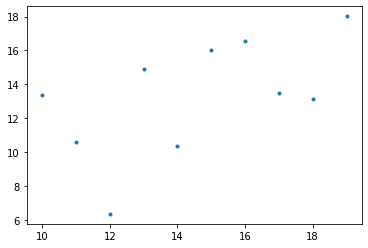

In [97]:
plt.plot(x, y, '.')
plt.show()

In [98]:
r, ratio_of_padding = check_corr_coef_matched(x, y)

In [99]:
r.append(actual_corr[0][1])
ratio_of_padding.append(11)

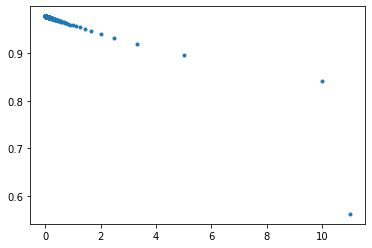

In [100]:
plt.plot(ratio_of_padding, r, '.')
plt.show()

As can be seen, when the zeros in both arrays are perfectly matched, the correlation coefficient increases with the number of zeros. The value at x = 11 is the correlation of the non-padded arrays. 

In [118]:
r_not_matched, ratio_of_padding_not_matched = check_corr_coef_not_matched(x, y, mu, sigma)

In [119]:
r_not_matched.append(actual_corr[0][1])
ratio_of_padding_not_matched.append(11)

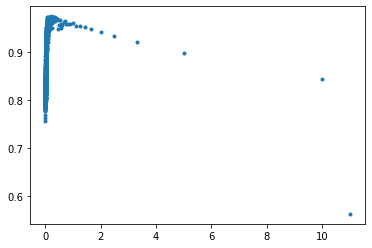

In [120]:
plt.plot(ratio_of_padding_not_matched, r_not_matched, '.')
plt.show()

If 10% of the padded zero values in one array are matched with non-zero values at the other array, it strongly impact the correlation from when the ratio of the padding to the original size array (here it is len(x) = len(y) = 10) is lower than 1 -> the padding is higher than 10 (so now x is = [0 0 0 0 0 0 0 0 0 0] + x). 

In [121]:
r_not_matched, ratio_of_padding_not_matched = check_corr_coef_not_matched(x, y, mu, sigma, prob = 0.5)

In [122]:
r_not_matched.append(actual_corr[0][1])
ratio_of_padding_not_matched.append(11)

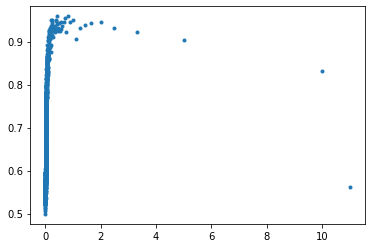

In [123]:
plt.plot(ratio_of_padding_not_matched, r_not_matched, '.')
plt.show()

And this is how it looks for when 50% of the padded zero are not matched. Obviously, the correlation goes down. 